## Problema de la mochila 0/1


- No se repiten los items
- Es una sola mochila

Definimos el problema que será la premisa a resolver mediante ambos algoritmos. Empezamos definiendo los pesos, los valores (beneficios) asociados, el peso máximo.
También es importante definir una solución inicial aleatoria

In [ ]:
import numpy as np

weights = [2, 3, 1, 4, 3, 5, 2, 6, 1, 1]
values = [3, 4, 2, 5, 6, 8, 5, 9, 4, 1]
max_weight = 15

In [ ]:
# step 1: solucion aleatoria
initial_solution = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Implementation del la solución con Hill Climbing

In [ ]:
# Funcion de fitness
def fitness(solution):
  total_weight = sum([ w for w,s in zip(weights, solution) if s == 1])
  total_value = sum([ v for v,s in zip(values, solution) if s == 1])
  if total_weight > max_weight:
    return 0 # penalizacion por exceder el peso
  return total_value

# Generar vecino
def get_neighbors(solution):
  neighbors = []
  n = len(solution)
  for i in range(n):
    new_sol = solution.copy()
    new_sol[i] = 1 - new_sol[i] # invierte de 1 a 0, o 0 a 1
    neighbors.append(new_sol)
  return neighbors

# Hill Climbing
def hill_climbing(solution):
  fitness_hist = []
  weights_hist = []
  while True:
    neighbors = get_neighbors(solution)
    best_neighbor = max(neighbors, key=fitness)

    fitness_solution = fitness(solution)
    fitness_best_neighbor = fitness(best_neighbor)
    fitness_hist.append(fitness_solution)

    if fitness_best_neighbor > fitness_solution:
      solution = best_neighbor
    else:
      return solution, fitness_hist

# Solucion Hill Climbing
def get_values_weight(solution):
  total_weight = sum([ w for w,s in zip(weights, solution) if s == 1])
  total_value = sum([ v for v,s in zip(values, solution) if s == 1])
  return total_value, total_weight

Ejecución de la solución

In [ ]:
# Ejecucion de la solucion
import time

def execute_algorithm(algorithm, *args):
  start = time.time()
  optimal_solution, fitness_hist = algorithm(*args)
  end = time.time()
  print(f"seg: {end - start}")

  optimal_value, final_weight = get_values_weight(optimal_solution)

  print(f'Solución óptima: {optimal_solution}')
  print(f'Valor total óptimo: {optimal_value}')
  print(f'peso alcanzado: {final_weight}')

  return fitness_hist

In [ ]:
fitness_hist_hc = execute_algorithm(hill_climbing, initial_solution)

seg: 0.0002818107604980469
Solución óptima: [1, 0, 0, 0, 0, 1, 1, 1, 0, 0]
Valor total óptimo: 25
peso alcanzado: 15


#### Implementación de la solución con Simulated Annealing

In [ ]:
T_max = 100
T_min = 0.01
cooling_rate = 0.9999

In [ ]:
def generate_neighbor(solution):
    neighbor = solution.copy()
    idx = np.random.randint(0, len(solution))
    neighbor[idx] = 1 - neighbor[idx]  # Cambia de 0 a 1 o de 1 a 0

    # Verifica si el vecino cumple con la restricción de peso
    total_weight = sum(w * s for w, s in zip(weights, neighbor))
    if total_weight <= max_weight:
        return neighbor
    else:
        return solution  # Si no cumple, devuelve la solución actual

def accept(delta, T):
  if delta > 0:
    return True
  else:
    r = np.random.rand() # random value entre 0 y 1
    delta_T = delta / T
    delta_T = np.clip(delta_T, -700, 700) # limitando delta para evitar desbordamiento
    if r < np.exp(delta_T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate):
    T = T_max
    solution = initial_solution.copy()
    value = fitness(solution)
    fitnes_hist = []
    while T > T_min:
        fitnes_hist.append(value)
        neighbor = generate_neighbor(solution)
        new_value = fitness(neighbor)
        delta = new_value - value

        if accept(delta, T):
            solution = neighbor
            value = new_value

        T = T * cooling_rate

    return solution, fitnes_hist


In [ ]:
# Ejecuta el algoritmo de recocido simulado
fitness_hist_sa = execute_algorithm(simulated_annealing, T_max, T_min, cooling_rate)


seg: 3.2235352993011475
Solución óptima: [0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
Valor total óptimo: 29
peso alcanzado: 15


Graficando

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def show_graph(fitness_hist_hc, fitness_hist_sa):
  plt.figure(figsize=(10, 8))

  plt.subplot(3, 1, 1)
  plt.plot(fitness_hist_hc, label='Fitness')
  plt.title('Fitness vs Iterations - Hill Climbing')
  plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
  plt.legend()

  plt.subplot(3, 1, 2)
  plt.plot(fitness_hist_sa, label='Fitness')
  plt.title('Fitness vs Iterations - Simulated Annealing')
  plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

  plt.legend()
  plt.tight_layout()
  plt.show()

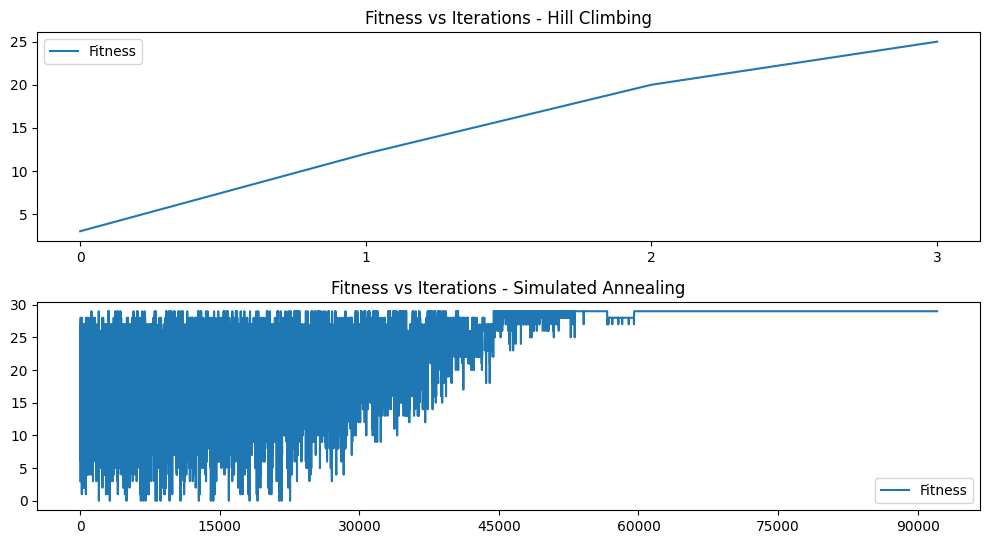

In [ ]:
show_graph(fitness_hist_hc, fitness_hist_sa)

Ejemplo # 2

In [ ]:
weights = [3, 7, 8, 9, 2, 4, 6, 1, 5, 7, 3, 2, 4, 6, 5, 3, 2, 4, 5, 6, 3, 4, 5, 1, 2]
values = [40, 42, 25, 30, 35, 50, 21, 10, 25, 34, 12, 18, 24, 27, 30, 32, 29, 26, 28, 36, 31, 33, 38, 20, 22]
max_weight = 50

initial_solution = [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]
#np.random.randint(2, size=25)
initial_solution

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
fitness_hist_hc_2 = execute_algorithm(hill_climbing, initial_solution)

seg: 0.0014171600341796875
Solución óptima: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
Valor total óptimo: 350
peso alcanzado: 50


In [ ]:
fitness_hist_sa_2 = execute_algorithm(simulated_annealing, T_max, T_min, cooling_rate)

seg: 8.467887163162231
Solución óptima: [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]
Valor total óptimo: 452
peso alcanzado: 49


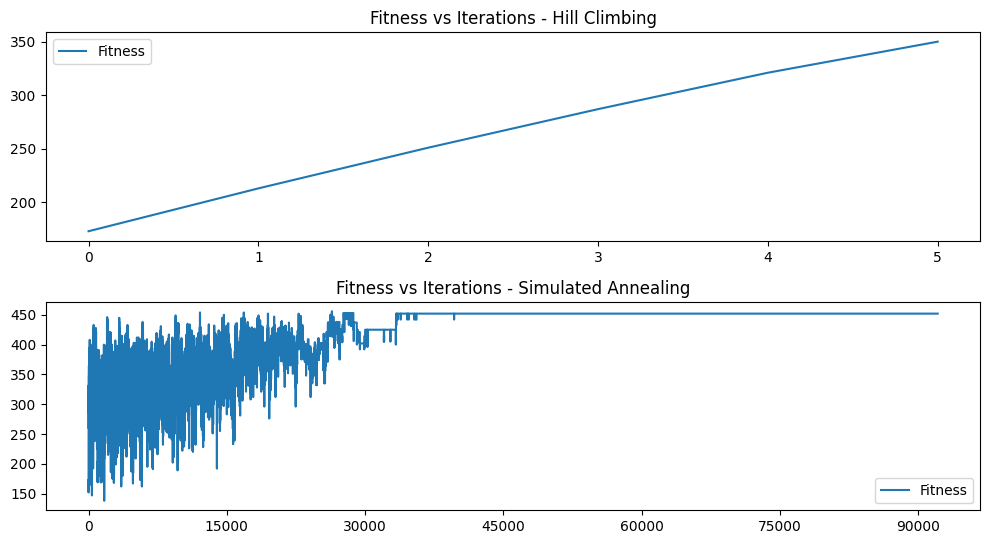

In [ ]:
show_graph(fitness_hist_hc_2, fitness_hist_sa_2)

EJEMPLO # 3

In [ ]:
np.random.seed(0)
weights = np.random.randint(1, 20, size=200)
values = np.random.randint(10, 100, size=200)
max_weight = 500

initial_solution = [1] + [0] * 199 # 200 pesos

In [ ]:
fitness_hist_hc_3 = execute_algorithm(hill_climbing, initial_solution)

seg: 2.3279666900634766
Solución óptima: [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Valor total óptimo: 4566
peso alcanzado: 500


In [ ]:
fitness_hist_sa_3 = execute_algorithm(simulated_annealing, T_max, T_min, cooling_rate)

seg: 17.503562450408936
Solución óptima: [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
Valor total óptimo: 5475
peso alcanzado: 500


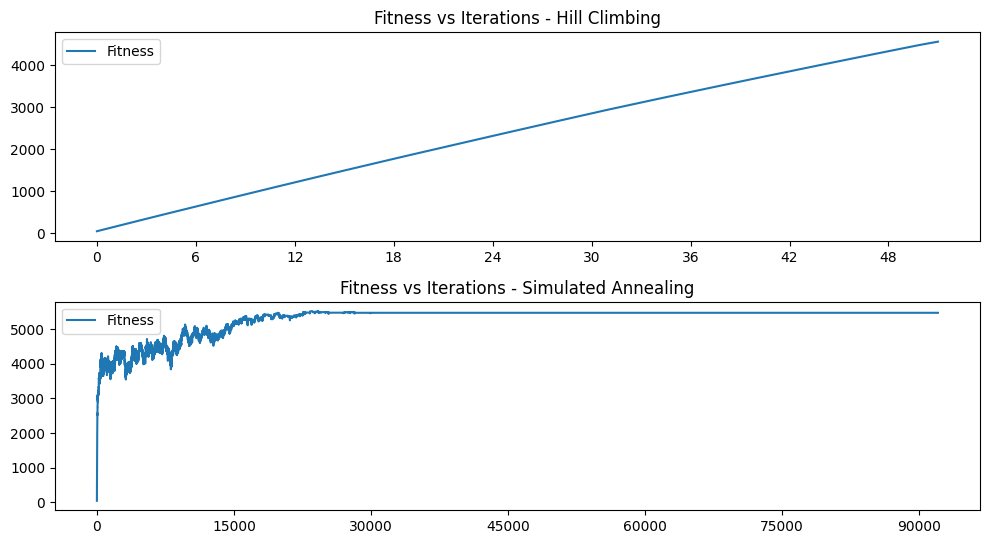

In [ ]:
show_graph(fitness_hist_hc_3, fitness_hist_sa_3)

CONCLUSIÓN: Como se puede observar, ambos algoritmos respetan el peso máximo, pero tienen una gran diferencia en la cantidad de interaciones máximas para llegar a una solución(50 vs 90,000), sin embargo, el algoritmo con mayor cantidad de iteraciones (Simulated Annealing) genera un mayor valor total óptimo y dicha diferencia se aprecia conforme se trabaja con mayor cantida de datos. Se aprecia también que el algoritmo Simulated Annealing puede ser optimizado ya que con aproximadamente 27 mil iteraciones ya llega a un valor muy cercano al óptimo, una forma de optimizarlo podría ser limitando la cantidad de iteraciones.

Se observa que a partir de las 25000 iteraciones aprox, el fitness no mejora. Consideremos modificar ligeramente la función "simulated_annealing" para controlar el número de teraciones, y de ese modo, optimizar el tiempo de ejecución del algoritmo.

In [ ]:
def simulated_annealing_with_limit(T_max, T_min, cooling_rate, iter_limit):
    T = T_max
    solution = initial_solution.copy()
    value = fitness(solution)
    fitnes_hist = []
    counter = 0
    while (T > T_min) and (counter <= iter_limit): # restricción por número de iteraciones
        fitnes_hist.append(value)
        neighbor = generate_neighbor(solution)
        new_value = fitness(neighbor)
        delta = new_value - value

        if accept(delta, T):
            solution = neighbor
            value = new_value

        T = T * cooling_rate
        counter += 1

    return solution, fitnes_hist

Procedamos a ejecutar el mismo caso del ejemplo anterior, con este ligero cambio

In [ ]:
fitness_hist_sa_4 = execute_algorithm(simulated_annealing_with_limit, T_max, T_min, cooling_rate, 25000)

seg: 3.301861047744751
Solución óptima: [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
Valor total óptimo: 5716
peso alcanzado: 499


Ahora tenemos una ejecución MUCHO MÁS ÓPTIMA en tiempo de ejecución. Tardó casi 5 veces menos que la ejecución anterior que no restringía el número de iteraciones.
Grafiquemos esta nueva ejecución de Simulated Annealing

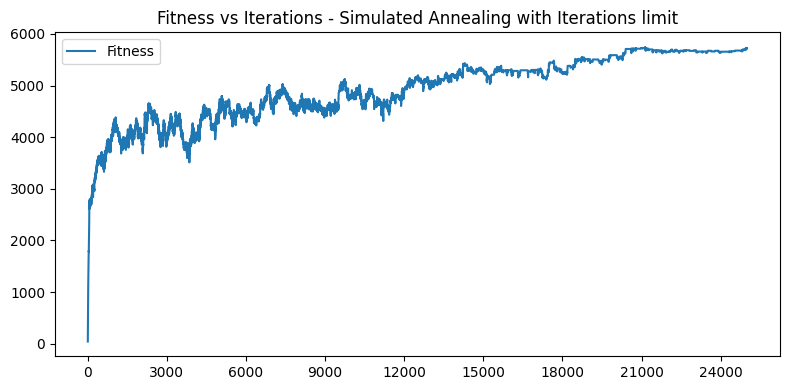

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 4))
plt.plot(fitness_hist_sa_4, label='Fitness')
plt.title('Fitness vs Iterations - Simulated Annealing with Iterations limit')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.tight_layout()
plt.show()